In [14]:
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sys.path.append('..')
from src.load_data import read_tables, tidy_and_split_data

In [16]:
df = read_tables("../data")
df

,30.00,40.00,50.00,h,35.00,45.00,55.00,25.00,20.50,25.50,30.50,35.50,35.5,24.0,28.0,31.0,34.50,39.0
0,22.75,31.85,38.30,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22.90,31.50,38.20,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22.75,31.30,38.45,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22.75,31.40,38.55,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22.65,31.40,38.45,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,NaN,NaN,NaN,15.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.55,21.10,24.00,25.90,28.65
91,NaN,NaN,NaN,15.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.65,21.25,24.95,25.75,28.85
92,NaN,NaN,NaN,15.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.50,21.20,24.85,26.00,28.95
93,NaN,NaN,NaN,15.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.55,21.35,24.10,25.65,28.85


In [17]:
tidy_df, X, y = tidy_and_split_data(df)
tidy_df

,h,H,R
738,15.05,20.5,13.80
739,15.05,20.5,13.50
740,15.05,20.5,13.65
741,15.05,20.5,13.65
742,15.05,20.5,13.65
...,...,...,...
499,17.80,55.0,39.40
497,17.80,55.0,39.50
498,17.80,55.0,39.85
495,17.80,55.0,39.50


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

### Build the model

In [ ]:
model = keras.Sequential([
    Dense(units=4, input_shape=(2,), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1)
])

optimizer = keras.optimizers.RMSprop(0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109 (436.00 B)

 Trainable params: 109 (436.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(X_train, y_train, epochs=150, verbose=0)

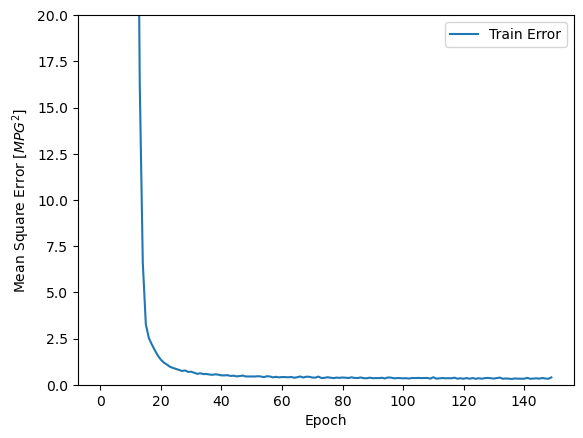

In [26]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

In [27]:
y_pred_test = model.predict(X_test)
y_pred = model.predict(X)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [28]:
root_mean_squared_error(y_test, y_pred_test), r2_score(y_test, y_pred_test)

(0.6111422533119951, 0.9923355451590549)

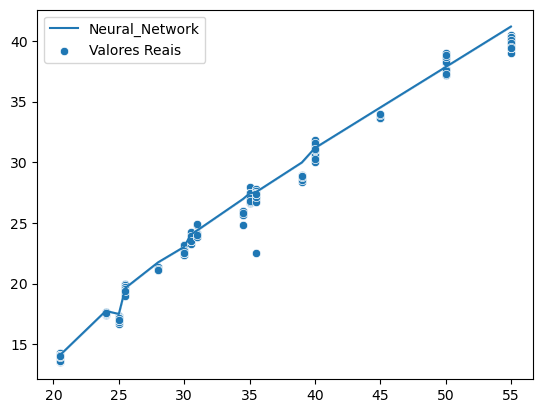

In [29]:
sns.lineplot(x=tidy_df.H.values, y=y_pred.reshape(-1,), label="Neural_Network")
sns.scatterplot(x=tidy_df.H.values, y=y, label="Valores Reais")

plt.show()